# NLP (Natural Language Processing) Spam or Ham Message Detection 

In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
messeges = open('smsspamcollection/SMSSpamCollection')

In [4]:
messeges = [line.rstrip() for line in messeges]

In [5]:
messeges[7]

"ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"

In [6]:
for mess_no, messege in enumerate(messeges[:10]):
    print(mess_no, messege)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [7]:
messeges[1]

'ham\tOk lar... Joking wif u oni...'

In [8]:
import pandas as pd

In [9]:
# reading all messeges as csv file

In [10]:
messeges = pd.read_csv('smsspamcollection/SMSSpamCollection', sep= '\t', names=['label', 'messege'])

In [11]:
messeges

,label,messege
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
# Performing EDA

In [13]:
messeges.describe()

,label,messege
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
messeges.groupby('label').describe()

messege                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [15]:
messeges['length'] = messeges['messege'].apply(len)

In [16]:
messeges.head()

,label,messege,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
# data viz imports 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
%matplotlib inline 

# Messege length 

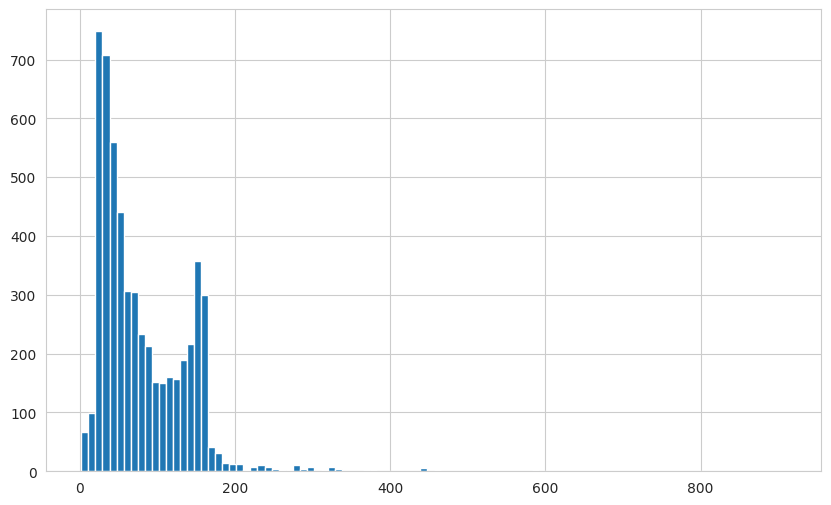

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.hist(messeges['length'], bins = 100)
plt.show()

In [21]:
messeges['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [22]:
messeges[messeges['length'] == 910]['messege'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

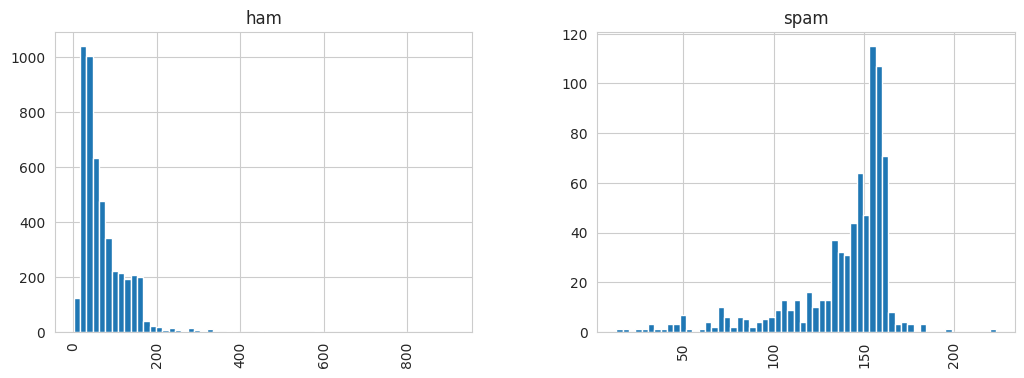

In [23]:
messeges.hist(column ='length', by ='label', bins=60, figsize=(12,4)) 

# Here begins the real kinda work__________

In [24]:
import string

In [25]:
# suppose we have a messed string contating punctuations, repeated words ,.......

In [26]:
mess = 'This is a sample messege ! Notice : This is the data without any punctuations ! , Right ?! '


In [27]:
# 1.removing all the punctuations from the string

In [28]:
nopunc = [c for c in mess if c not in string.punctuation]

In [29]:
## the above method was the example of how the string punctuations are removed 

In [30]:
# import stopwords that we have downloaded very earlier 

In [31]:
from nltk.corpus import stopwords

In [32]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
# 2. Joining the words with the original string without any punctuations, hence it will be our clean sting without any punctuation 

In [34]:
nopunc = ''.join(nopunc)

In [35]:
nopunc

'This is a sample messege  Notice  This is the data without any punctuations   Right  '

In [36]:
# How does ''.join works ??

In [37]:
x = ['a','b','c','d']

In [38]:
'--'.join(x)

'a--b--c--d'

In [39]:
# back to our nopunc list 

In [40]:
# 3 splitting all the words from nopunc string

In [41]:
nopunc.split()

['This',
 'is',
 'a',
 'sample',
 'messege',
 'Notice',
 'This',
 'is',
 'the',
 'data',
 'without',
 'any',
 'punctuations',
 'Right']

In [42]:
# .4 cleaning the unnecessary words from our string data -> nopunc

In [43]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

In [44]:
clean_mess

['sample', 'messege', 'Notice', 'data', 'without', 'punctuations', 'Right']

In [45]:
 # here we got a clean word with no punctuation and repeated words 

In [46]:
# Now putting all these process to a function 
# Performing above process with our earlier messages['messege'] column

In [47]:
def text_process(mess):
    """
    1. remove puncutations
    2. remove stop words 
    3. return list of clean text words 
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [48]:
# the process is also called tokenization 
# let's pass the messege of our dataframe messeges into the above function 

In [49]:
messeges.head()

,label,messege,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [50]:
messeges['messege'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messege, dtype: object

### Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand and so I'll leave you to explore those more advanced methods through the [NLTK book online](http://www.nltk.org/book/).

# Vectorization 

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messeges['messege'])

In [53]:
print(len(bow_transformer.vocabulary_))

11425


In [54]:
# Selecting a messege at index 3 or 4th one 

In [55]:
mess4 = messeges['messege'][3]

In [56]:
mess4

'U dun say so early hor... U c already then say...'

In [57]:
# transforming

In [58]:
bow4 = bow_transformer.transform([mess4])

In [59]:
bow4.shape

(1, 11425)

In [60]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [61]:
bow_transformer.get_feature_names_out()[4068]

'U'

In [62]:
bow_transformer.get_feature_names_out()[9554]

'say'

In [63]:
## transferming the whole messeges

In [64]:
messeges_bow = bow_transformer.transform(messeges['messege'])

In [65]:
messeges_bow.shape

(5572, 11425)

In [66]:
# check the amount of non zero occurances

In [67]:
messeges_bow.nnz

50548

In [68]:
# nnz = non-zero occurences

In [69]:
from sklearn.feature_extraction.text import TfidfTransformer

In [70]:
tfidf_transformer = TfidfTransformer().fit(messeges_bow)

In [71]:
tfidf4 = tfidf_transformer.transform(bow4)

In [72]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [73]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [81]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['hello']]

7.8339293183414815

In [83]:
messeges_tfidf = tfidf_transformer.transform(messeges_bow)

In [85]:
messeges_tfidf.shape

(5572, 11425)

In [86]:
from sklearn.naive_bayes import MultinomialNB

In [88]:
spam_detect_model = MultinomialNB().fit(messeges_tfidf, messeges['label'])

In [90]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [91]:
#checking result 

In [92]:
messeges['label'][3]

'ham'

In [93]:
# our geuess is correct 

In [94]:
# In above process , we trained and tested on the same model which is liked to give 100% accurate prediction . 
# Instead of training and testing the model into a same data , we should split the data into train and test as we have done using tran_test_split

In [95]:
# Using train_test_split

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
msg_train , msg_test, label_train , label_test = train_test_split(messeges['messege'], messeges['label'], test_size=0.3)

In [98]:
msg_train

357     Congratulations ur awarded 500 of CD vouchers ...
1858    I hate when she does this. She turns what shou...
2823    ROMCAPspam Everyone around should be respondin...
47                        Fair enough, anything going on?
3453                             Ugh just got outta class
                              ...                        
133                             First answer my question.
2688                                                 Okie
2436                           Oh ya ya. I remember da. .
3609                       Pls come quick cant bare this.
60      Your gonna have to pick up a $1 burger for you...
Name: messege, Length: 3900, dtype: object

 ##### We did many stuffs to predict the messege whether it is spam or ham , sklearn has a data pipeline feature which do all the stuffs which we did customly above 

In [99]:
from sklearn.pipeline import Pipeline

In [106]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()) ## here we can actually use RandomForestClassifier()
])

In [101]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb50b162020>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [102]:
predictions = pipeline.predict(msg_test)

In [103]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1452
        spam       1.00      0.74      0.85       220

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.97      0.96      1672



# Isn't it cool ;)

## More Resources

Check out the links below for more info on Natural Language Processing:

[NLTK Book Online](http://www.nltk.org/book/)

[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)

[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)